In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./StudentPerformanceFactors.csv')

In [3]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.shape

(6607, 20)

In [6]:
df = df.dropna(subset=['Teacher_Quality','Parental_Education_Level','Distance_from_Home'])

In [7]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [9]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [10]:
df_encoded = pd.get_dummies(df, columns=['Learning_Disabilities', 'School_Type','Internet_Access','Extracurricular_Activities'], drop_first=True, dtype=int)


In [11]:
df_encoded

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Learning_Disabilities_Yes,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes
0,23,84,Low,High,7,73,Low,0,Low,Medium,Positive,3,High School,Near,Male,67,0,1,1,0
1,19,64,Low,Medium,8,59,Low,2,Medium,Medium,Negative,4,College,Moderate,Female,61,0,1,1,0
2,24,98,Medium,Medium,7,91,Medium,2,Medium,Medium,Neutral,4,Postgraduate,Near,Male,74,0,1,1,1
3,29,89,Low,Medium,8,98,Medium,1,Medium,Medium,Negative,4,High School,Moderate,Male,71,0,1,1,1
4,19,92,Medium,Medium,6,65,Medium,3,Medium,High,Neutral,4,College,Near,Female,70,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,7,76,Medium,1,High,Medium,Positive,2,High School,Near,Female,68,0,1,1,0
6603,23,76,High,Medium,8,81,Medium,3,Low,High,Positive,2,High School,Near,Female,69,0,1,1,0
6604,20,90,Medium,Low,6,65,Low,3,Low,Medium,Negative,2,Postgraduate,Near,Female,68,0,1,1,1
6605,10,86,High,High,6,91,High,2,Low,Medium,Positive,3,High School,Far,Female,68,0,0,1,1


In [12]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['Teacher_Quality'] = df['Teacher_Quality'].map(mapping)

In [13]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['Motivation_Level'] = df['Motivation_Level'].map(mapping)  

In [14]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['Access_to_Resources'] = df['Access_to_Resources'].map(mapping)  

In [15]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['Parental_Involvement'] = df['Parental_Involvement'].map(mapping)  

In [16]:
mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}
df_encoded['Distance_from_Home'] = df['Distance_from_Home'].map(mapping)  

In [17]:
columnsDrop = ['Parental_Education_Level','Peer_Influence','Family_Income', 'Physical_Activity','Learning_Disabilities_Yes', 'Distance_from_Home','Gender']

In [18]:
df_encoded = df_encoded.drop(columns= columnsDrop, axis=1)

In [19]:
df_encoded.shape

(6378, 13)

In [20]:
X = df_encoded.drop('Exam_Score', axis=1)

In [21]:
df_encoded

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Exam_Score,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes
0,23,84,1,3,7,73,1,0,2,67,1,1,0
1,19,64,1,2,8,59,1,2,2,61,1,1,0
2,24,98,2,2,7,91,2,2,2,74,1,1,1
3,29,89,1,2,8,98,2,1,2,71,1,1,1
4,19,92,2,2,6,65,2,3,3,70,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,7,76,2,1,2,68,1,1,0
6603,23,76,3,2,8,81,2,3,3,69,1,1,0
6604,20,90,2,1,6,65,1,3,2,68,1,1,1
6605,10,86,3,3,6,91,3,2,2,68,0,1,1


In [22]:
y = df_encoded['Exam_Score']

In [23]:
df_encoded['Sleep_Hours'].max()

10

In [24]:
y

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6378, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,School_Type_Public,Internet_Access_Yes,Extracurricular_Activities_Yes
2356,18,95,1,3,7,96,2,2,3,0,1,0
4758,16,89,3,2,8,58,1,2,2,1,1,1
2281,16,69,2,3,6,55,2,1,3,1,1,1
485,11,65,2,3,7,78,2,2,2,1,1,0
4200,21,95,2,3,8,57,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3904,30,70,3,1,6,84,3,2,2,1,1,0
5378,24,90,1,1,9,97,3,3,2,1,1,1
5415,24,65,1,3,7,52,2,1,2,1,1,1
5582,30,91,2,3,7,95,1,1,3,1,1,1


In [27]:
y_train.shape

(5102,)

In [28]:
y_test.shape

(1276,)

In [29]:
model1 = RandomForestRegressor( n_estimators=500,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=4,
    max_features='sqrt'
)

In [30]:
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=500)

In [31]:
y_pred = model1.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.6518491851441388


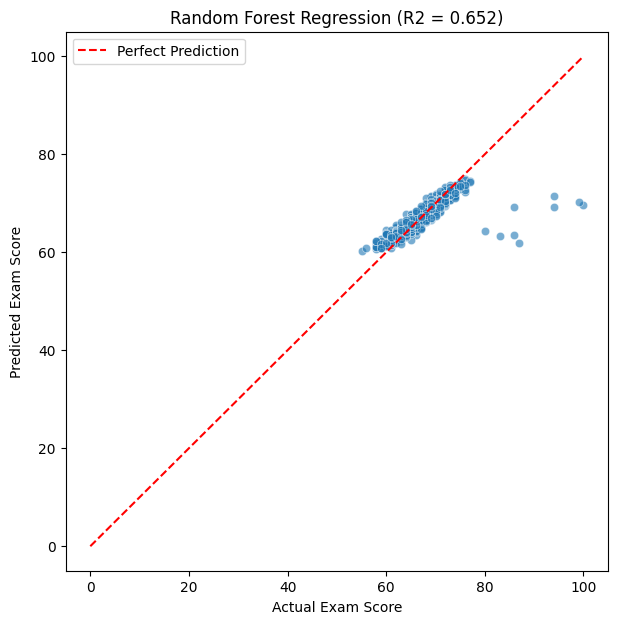

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0,100], [0,100], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title(f'Random Forest Regression (R2 = {r2_score(y_test, y_pred):.3f})')
plt.legend()
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model2 = LinearRegression()

In [35]:
model2.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred2 = model2.predict(X_test)

In [37]:
print("R2 Score:", r2_score(y_test, y_pred2))

R2 Score: 0.6923789206764479


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

model3 = SVR(C= 100, epsilon= 1, gamma= 'scale', kernel= 'linear')
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred3)))

import pickle
pickle.dump(model3, open('model.pkl', 'wb'))


R2 Score: 0.6914288753543409
RMSE: 2.1897458728050143


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

model3 = SVR(C= 100, epsilon= 1, gamma= 'scale', kernel= 'linear')
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred3)))


R2 Score: 0.6914288753543409
RMSE: 2.1897458728050143


In [41]:
weights = model3.coef_
intercept = model3.intercept_

In [42]:
weights

array([[1.7857373 , 2.31796253, 0.68797579, 0.69412776, 0.01288475,
        0.68928752, 0.36009483, 0.64678771, 0.31047169, 0.00842634,
        0.26736561, 0.26229794]])

In [481]:
import pickle
pickle.dump(model3, open('model.pkl', 'wb'))

In [ ]:
new_student = {
    'Hours_Studied': 12,
    'Attendance': 85,
    'Parental_Involvement': 2,
    'Access_to_Resources': 1,
    'Sleep_Hours': 7,
    'Previous_Scores': 75,
    'Motivation_Level': 2,
    'Tutoring_Sessions': 3,
    'Teacher_Quality': 2,
    'Learning_Disabilities_Yes': 0,
    'School_Type_Public': 1,
    'Internet_Access_Yes': 1
}

# Convert to DataFrame
new_df = pd.DataFrame([12,85,2,1,7,75,2,3,2,0,1,1])
23	84	3	7	73	1	0	2	67	0	1	0	1	1	0	1

# Ensure correct column order
# new_df = new_df.reindex(columns=X_train.columns)

# Scale
new_scaled = scaler.transform(new_df)

# Predict
predicted_score = model3.predict(new_scaled)
print("Predicted Exam Score:", predicted_score[0])
